In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV

import pickle

In [3]:
df = pd.read_csv('PriceCorrLoadFileALT.csv')

In [4]:
df.head(5)

,YR-MON,Silver,Silver-1,Silver-2,Silver-3,Silver-4,Silver-5,Silver-6,Copper,Copper-1,...,Copper-5,Copper-6,Steel,Steel-1,Steel-2,Steel-3,Steel-4,Steel-5,Steel-6,KeyDate
0,2009-Sep,0.142,0.074,-0.088,0.045,0.121,-0.046,-0.022,0.005,0.176,...,0.182,0.141,0.036,0.049,0.041,0.011,0.002,-0.061,-0.030,0
1,2009-Oct,0.052,0.142,0.074,-0.088,0.045,0.121,-0.046,0.018,0.005,...,0.032,0.182,0.012,0.036,0.049,0.041,0.011,0.002,-0.061,0
2,2009-Nov,0.034,0.052,0.142,0.074,-0.088,0.045,0.121,0.055,0.018,...,0.088,0.032,-0.024,0.012,0.036,0.049,0.041,0.011,0.002,0
3,2009-Dec,-0.008,0.034,0.052,0.142,0.074,-0.088,0.045,0.050,0.055,...,0.047,0.088,0.023,-0.024,0.012,0.036,0.049,0.041,0.011,0
4,2010-Jan,0.006,-0.008,0.034,0.052,0.142,0.074,-0.088,0.048,0.050,...,0.176,0.047,0.051,0.023,-0.024,0.012,0.036,0.049,0.041,0


In [5]:
y = df[['KeyDate']]

In [6]:
X = df.drop(['YR-MON', 'KeyDate'], axis=1)

In [7]:
##X.set_index('YR-MON')

In [8]:
##y.set_index('YR-MON')

In [9]:
X.shape

(139, 21)

In [10]:
y.shape

(139, 1)

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 10% testing, 90% training

In [22]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred_train = clf.predict(X_train)
y_pred2 = clf.predict(X)

In [23]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Accuracy, how often is model correct? 
print("Accuracy - small sample test:",accuracy)

# Precision, how often does model get predict positives correctlu?
print ("Precision - small sample test:", precision)

# Recall, how often does model find all the positive labels?
print ("Recall - small sample test:", recall)

Accuracy: 0.9285714285714286
Precision: 0.0
Recall: 0.0


In [34]:
accuracy2 = metrics.accuracy_score(y, y_pred2)
print("Accuracy - all data:",accuracy2)

recall2 = metrics.recall_score(y, y_pred2)
print ("Precision - all data:", precision2)

precision2 = metrics.precision_score(y, y_pred2)
print ("Recall - all data:", recall2)

Accuracy - all data: 0.9928057553956835
Precision - all data: 1.0
Recall - all data: 0.9230769230769231


In [25]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Steel-5     0.091321
Silver-5    0.079442
Steel-6     0.066916
Silver-4    0.065110
Copper-3    0.061835
Copper-2    0.056811
Silver-6    0.056430
Copper-1    0.056010
Silver      0.053813
Silver-2    0.053626
Copper      0.045935
Copper-6    0.045546
Silver-1    0.041586
Copper-4    0.040209
Steel-3     0.037224
Steel       0.029753
Steel-2     0.028856
Copper-5    0.027445
Silver-3    0.024285
Steel-4     0.020953
Steel-1     0.016893
dtype: float64

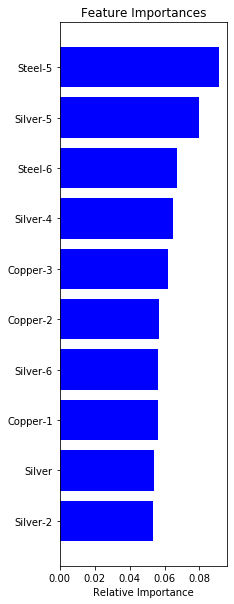

In [26]:
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(3,10))
plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
## create a predictions dataframe copying indices from X_test then merge with the original data.

y_pred_df = pd.DataFrame(data = y_pred, columns = ['KeyDate'], index = X_test.index.copy())
df_out = pd.merge(df, y_pred_df, how = 'left', left_index = True, right_index = True)

In [28]:
## create a predictions dataframe copying indices from X_test then merge with the original data (entire dataset)

y_pred2_df = pd.DataFrame(data = y_pred2, columns = ['KeyDate'], index = X.index.copy())
df_out2 = pd.merge(df, y_pred2_df, how = 'left', left_index = True, right_index = True)

In [29]:
df_out2 .rename(columns={'KeyDate_x':'KeyDate', 'KeyDate_y':'KeyDate_pred'}, inplace=True)

In [30]:
df_out2[df_out2['KeyDate'] == 1][['YR-MON', 'KeyDate', 'KeyDate_pred']]

,YR-MON,KeyDate,KeyDate_pred
9,2010-Jun,1,1
25,2011-Oct,1,1
36,2012-Sep,1,1
48,2013-Sep,1,1
60,2014-Sep,1,1
72,2015-Sep,1,1
78,2016-Mar,1,0
84,2016-Sep,1,1
96,2017-Sep,1,1
98,2017-Nov,1,1


In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, np.ravel(Y_train,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)

NameError: name 'X_train' is not defined